<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-projects/blob/main/Project_02_Bank_Notes_Detection_Classification_ANN/Project_02_Bank_Notes_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank-Notes-Detection-System-Using-ANN**

# **Step 1: Load Tools**

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import modules for model training and evaluation from scikit-learn
from sklearn.model_selection import train_test_split # For splitting data into training, validation, and testing sets
from sklearn.preprocessing import StandardScaler # For standardizing features
from sklearn.metrics import classification_report, confusion_matrix, roc_curve # For evaluating model performance

# Import modules for building and training the ANN model from TensorFlow/Keras
from tensorflow.keras.models import Sequential # To create a sequential model
from tensorflow.keras.layers import Dense, Dropout # For adding layers to the model
from tensorflow.keras.callbacks import EarlyStopping # For stopping training early
from tensorflow.keras.utils import to_categorical # For one-hot encoding the target variable (if needed, though not used in this specific case for binary classification)

# **Step 2. Load the Dataset**

In [3]:
# Load the dataset from a CSV file named 'train.csv' into a pandas DataFrame
data = pd.read_csv('train.csv')
# Display the first 5 rows of the DataFrame to get a glimpse of the data structure and content
display(data.head())

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


# **3. Data Preprocessing**

In [4]:
# Separate the features (input variables) and the target variable (output variable)
# X contains the features 'VWTI', 'SWTI', 'CWTI', 'EI'
X = data[['VWTI', 'SWTI', 'CWTI', 'EI']]
# y contains the target variable 'Class'
y = data['Class']

In [5]:
# Split the data into training and testing sets
# 80% of the data is used for training (X_train, y_train)
# 20% of the data is used for testing (X_test, y_test)
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Split the training data further into training and validation sets
# This is done to have a separate set for evaluating the model during training and tuning hyperparameters
# 80% of the original training data is kept as the final training set (X_train, y_train)
# 20% of the original training data is used as the validation set (X_val, y_val)
# random_state=42 ensures reproducibility of this split as well
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data to learn the mean and standard deviation of the features
# Then, transform the training data to standardize the features (mean=0, variance=1)
X_train = scaler.fit_transform(X_train)

In [8]:
# Transform the validation data using the scaler fitted on the training data
# It's important to only fit the scaler on the training data to avoid data leakage from the validation/test sets
X_val = scaler.transform(X_val)
# Transform the test data using the same scaler fitted on the training data
X_test = scaler.transform(X_test)

In [9]:
# Convert the target variables from pandas Series to numpy arrays
# This is often required by machine learning models, including those in TensorFlow/Keras
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [10]:
# Print the shapes of the training, validation, and test feature and target sets
# This helps verify that the data splitting and preparation were done correctly
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}, y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (700, 4), y_train shape: (700,)
X_val shape: (176, 4), y_val shape: (176,)
X_test shape: (220, 4), y_test shape: (220,)


# **4. Build the ANN Model**

In [11]:
# Create a Sequential model, which is a linear stack of layers
model = Sequential([
    # Add the first Dense layer with 64 neurons and ReLU activation function
    # input_shape specifies the shape of the input data (number of features)
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # Add a Dropout layer with a dropout rate of 0.3 to prevent overfitting
    Dropout(0.3),

    # Add the second Dense layer with 32 neurons and ReLU activation function
    Dense(32, activation='relu'),
    # Add another Dropout layer with a dropout rate of 0.3
    Dropout(0.3),

    # Add the third Dense layer with 16 neurons and ReLU activation function
    Dense(16, activation='relu'),

    # Add the output Dense layer with 1 neuron and sigmoid activation function
    # Sigmoid is used for binary classification to output a probability between 0 and 1
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(
    # Use the Adam optimizer for efficient gradient descent
    optimizer='adam',
    # Use binary crossentropy as the loss function for binary classification
    loss='binary_crossentropy',
    # Monitor accuracy during training
    metrics=['accuracy']
    )

In [13]:
# Define EarlyStopping callback
# This callback monitors a specified metric (val_loss in this case)
# Training will stop if the monitored metric does not improve for a certain number of epochs (patience)
# restore_best_weights=True restores the model weights from the epoch with the best value of the monitored metric
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor the validation loss
    patience=5,         # Stop training if validation loss does not improve for 5 epochs
    restore_best_weights=True # Restore weights from the epoch with the best validation loss
    )

In [14]:
# Print a summary of the model architecture
# This includes the type of layers, output shape of each layer, and the number of parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

#**5.Train the Model**

In [15]:
# Train the model using the training data
history = model.fit(
    X_train, y_train, # Training data and labels
    epochs=15,        # Number of training epochs
    batch_size=32,    # Number of samples per gradient update
    validation_data=(X_val, y_val), # Validation data and labels
    callbacks=[early_stopping]      # Use the EarlyStopping callback
    )

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4639 - loss: 0.7166 - val_accuracy: 0.8239 - val_loss: 0.6107
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7511 - loss: 0.6023 - val_accuracy: 0.9261 - val_loss: 0.5151
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8498 - loss: 0.4845 - val_accuracy: 0.9375 - val_loss: 0.3794
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8905 - loss: 0.3783 - val_accuracy: 0.9318 - val_loss: 0.2400
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9527 - loss: 0.2303 - val_accuracy: 0.9545 - val_loss: 0.1427
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9589 - loss: 0.1547 - val_accuracy: 0.9659 - val_loss: 0.0873
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9612 - loss: 0.1064 - val_accuracy: 0.9716 - val_loss: 0.0682
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9881 - loss: 0.0613 - val_accuracy: 0.9773 - val_los

# **6. Evaluate the Model**

In [16]:
# Evaluate the trained model on the test data
# This returns the loss and metrics (accuracy in this case) on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test loss and test accuracy
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9965 - loss: 0.0141 
Test Loss: 0.017582029104232788, Test Accuracy: 0.9954545497894287


#**7.Generate Evaluation Metrics**

In [17]:
# Use the trained model to predict the class probabilities for the test data
y_pred_prob = model.predict(X_test)
# Convert the probabilities to predicted classes (0 or 1) based on a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

# Print the classification report, which includes precision, recall, F1-score, and support for each class
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix, which shows the number of true positive, true negative, false positive, and false negative predictions
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        85

    accuracy                           1.00       220
   macro avg       0.99      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220


Confusion Matrix:
[[134   1]
 [  0  85]]


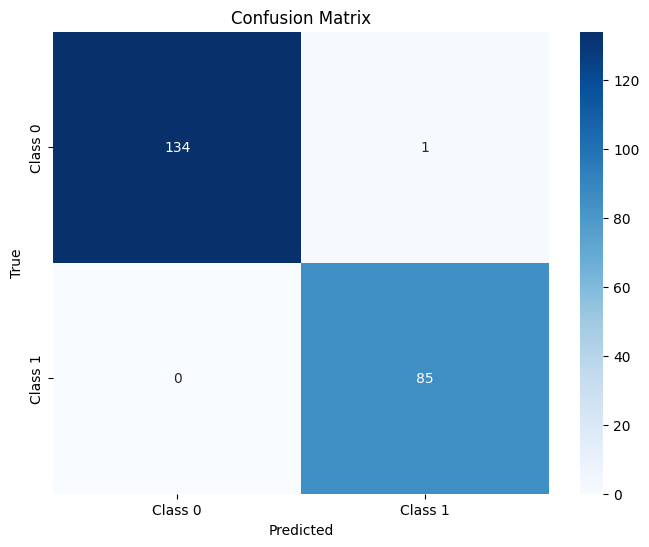

In [18]:
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted') # Label for the x-axis
plt.ylabel('True') # Label for the y-axis
plt.title('Confusion Matrix') # Title of the heatmap
plt.show() # Display the plot

#**Step 8: Prediction System**



In [20]:
import numpy as np

# Define a function to make predictions on new input data
def make_predictino(input_data):
  # Scale the input data using the same scaler that was fitted on the training data
  input_data_scaled = scaler.transform(input_data)

  # Use the trained model to predict the probability of the input data belonging to class 1
  prediction = model.predict(input_data_scaled)

  # Convert the probability to a predicted class (0 or 1) based on a threshold of 0.5
  predicted_class = (prediction > 0.5).astype(int)

  # Return 'Real' if the predicted class is 1, and 'Fake' if the predicted class is 0
  if predicted_class[0] == 1:
    return 'Real'
  else:
    return 'Fake'

In [21]:
# Define input data as a numpy array
input_data = np.array([[1.5, 2.3, 3.4, 0.7]])

# Make a prediction using the make_prediction function and the defined input data
result = make_predictino(input_data)
# Print the prediction result
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Fake


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Define another input data point as a numpy array
input_data = np.array([[-3.9411, -12.8792,  13.0597,  -3.3125]])

# Make a prediction using the make_prediction function and the new input data
result = make_predictino(input_data)

# Print the prediction result
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Real


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#**Step 9: Save Model**

In [23]:
import pickle

# Save the trained Keras model to a file named 'model.h5'
# Note: Saving in the native Keras format (.keras) is recommended for newer versions
model.save('models/model.h5')

# Save the fitted StandardScaler object to a file named 'scaler.pkl' using pickle
# This is important so you can scale new input data before making predictions later
with open('models/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)